<a href="https://colab.research.google.com/github/sasukeurahara/Team-Kanayarashi-Hash-It-Out/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

real = "/content/drive/MyDrive/real_and_fake_face/training_real/"
fake = "/content/drive/MyDrive/real_and_fake_face/training_fake/"
datadir = "/content/drive/MyDrive/real_and_fake_face/"


real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [5]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

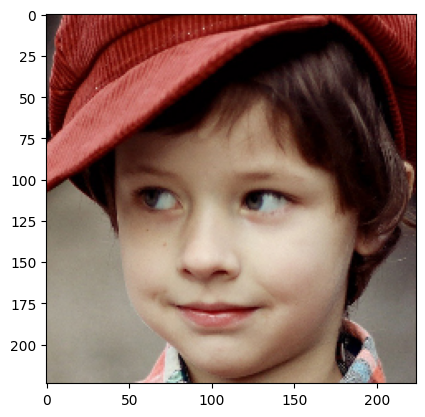

In [6]:
plt.imshow(load_img(real + real_path[2]), cmap='gray')

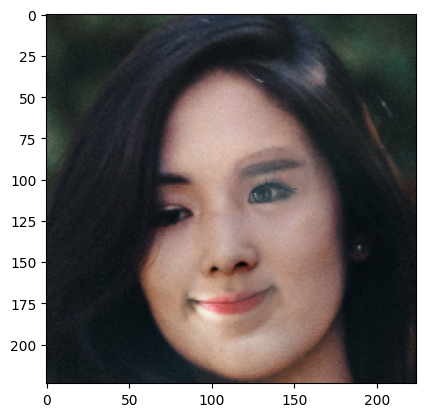

In [7]:
plt.imshow(load_img(fake + fake_path[20]), cmap='gray')

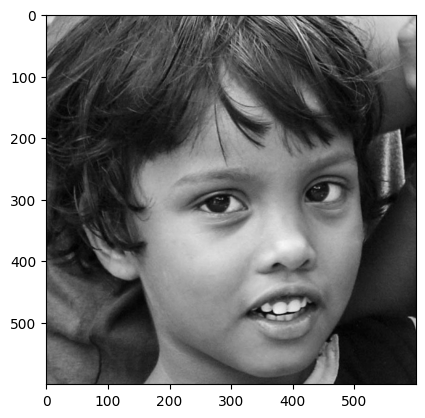

training_real


In [8]:
categories = ["training_real" , "training_fake"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        print(category)
        break
    break

In [9]:
training_data = []
IMG_SIZE = 224

categories = ["training_real" , "training_fake"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()

In [10]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
1
1
0


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [12]:
print(X.shape)
print(y.shape)

(2041, 224, 224, 3)
(2041,)


In [13]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [15]:
vgg16_model = keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 26s 0us/step


In [16]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
from keras.models import Sequential

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [18]:
for layer in model.layers:
    layer.trainable = False

In [19]:
from keras.layers import Dense
model.add(Dense(2, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train,y_train, batch_size=20, epochs = 50, validation_split=0.1)

Epoch 1/50
74/74 [==============================] - 23s 156ms/step - loss: 0.9840 - accuracy: 0.5388 - val_loss: 1.4534 - val_accuracy: 0.5549
Epoch 2/50
74/74 [==============================] - 9s 119ms/step - loss: 0.7381 - accuracy: 0.6308 - val_loss: 0.9303 - val_accuracy: 0.5854
Epoch 3/50
74/74 [==============================] - 9s 127ms/step - loss: 0.5703 - accuracy: 0.7023 - val_loss: 0.8887 - val_accuracy: 0.5732
Epoch 4/50
74/74 [==============================] - 10s 130ms/step - loss: 0.4927 - accuracy: 0.7473 - val_loss: 0.8935 - val_accuracy: 0.5854
Epoch 5/50
74/74 [==============================] - 9s 126ms/step - loss: 0.5169 - accuracy: 0.7514 - val_loss: 0.9327 - val_accuracy: 0.5305
Epoch 6/50
74/74 [==============================] - 10s 133ms/step - loss: 0.4168 - accuracy: 0.7970 - val_loss: 0.9749 - val_accuracy: 0.5122
Epoch 7/50
74/74 [==============================] - 10s 133ms/step - loss: 0.3766 - accuracy: 0.8331 - val_loss: 0.9358 - val_accuracy: 0.5427
Ep

In [21]:
predictions = model.predict(X_test)

13/13 [==============================] - 11s 470ms/step


In [22]:
predictions

array([[4.10169959e-01, 5.89830041e-01],
       [4.21216011e-01, 5.78783989e-01],
       [9.99851346e-01, 1.48576422e-04],
       [9.99703348e-01, 2.96637067e-04],
       [1.20330469e-05, 9.99987960e-01],
       [6.16260152e-03, 9.93837416e-01],
       [6.95339812e-04, 9.99304652e-01],
       [4.65670437e-01, 5.34329534e-01],
       [9.80672166e-02, 9.01932776e-01],
       [3.70292455e-01, 6.29707575e-01],
       [9.66173947e-01, 3.38260531e-02],
       [3.64552476e-02, 9.63544726e-01],
       [9.98993099e-01, 1.00686087e-03],
       [9.94891047e-01, 5.10891574e-03],
       [8.83022308e-01, 1.16977662e-01],
       [6.73540160e-02, 9.32645977e-01],
       [9.04319823e-01, 9.56801698e-02],
       [1.21277049e-01, 8.78722906e-01],
       [4.67943912e-03, 9.95320499e-01],
       [1.35024324e-01, 8.64975691e-01],
       [8.08361113e-01, 1.91638947e-01],
       [5.19805327e-02, 9.48019445e-01],
       [9.99395847e-01, 6.04183122e-04],
       [7.80209973e-02, 9.21979070e-01],
       [3.002355

In [23]:
rounded_predictions =(model.predict(x= X_test) > 0.5).astype("int32")
for i in rounded_predictions[:10]:
    print(i)

13/13 [==============================] - 2s 142ms/step
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [24]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

13/13 [==============================] - 2s 142ms/step - loss: 1.6909 - accuracy: 0.5575
1.6908961534500122
0.5574572086334229


In [25]:
d= pd.DataFrame(predictions)
d

,0,1
0,0.410170,0.589830
1,0.421216,0.578784
2,0.999851,0.000149
3,0.999703,0.000297
4,0.000012,0.999988
...,...,...
404,0.998146,0.001854
405,0.808575,0.191425
406,0.994387,0.005613
407,0.953286,0.046714


In [26]:
rounded_prediction = np.mean(model.predict(X_test), axis=1)
for i in rounded_prediction[:10]:
    print(i)

13/13 [==============================] - 2s 142ms/step
0.5
0.5
0.49999997
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [27]:
d1=pd.Series(rounded_prediction)

In [28]:
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE,IMG_SIZE,3)

In [29]:
# n=20
# if d[n]> 0.5:
#   print("Real")
# else:
#   print("Fake")""

1/1 [==============================] - 0s 72ms/step
Probabilities:  [0.06735402 0.932646  ]
Actual:  Fake-Face
13/13 [==============================] - 2s 142ms/step
Prediction:  Fake-Face


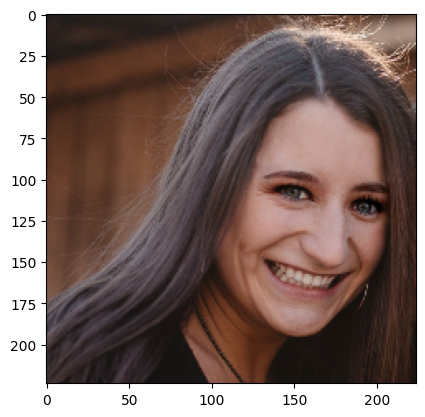

In [39]:
n = 15

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 29ms/step
Probabilities:  [0.28097168 0.71902835]
Actual:  Fake-Face
13/13 [==============================] - 2s 141ms/step
Prediction:  Fake-Face


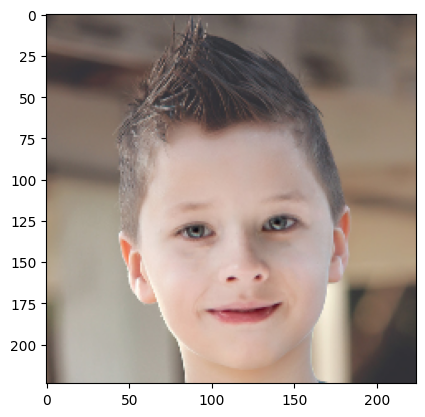

In [42]:
n = 95

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 30ms/step
Probabilities:  [1.071684e-05 9.999893e-01]
Actual:  Fake-Face
13/13 [==============================] - 2s 144ms/step
Prediction:  Fake-Face


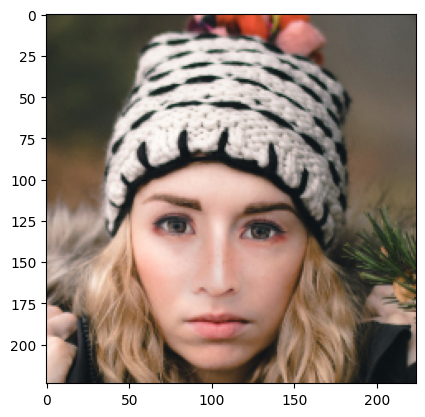

In [32]:
n = 60

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 19ms/step
Probabilities:  [0.8895311  0.11046898]
Actual:  Real-Face
13/13 [==============================] - 2s 144ms/step
Prediction:  Real-Face


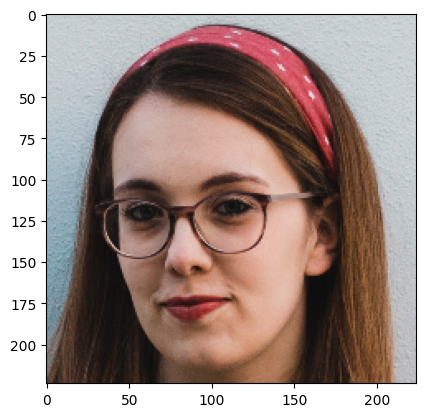

In [33]:
n = 377

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 33ms/step
Probabilities:  [0.03790154 0.9620985 ]
Actual:  Fake-Face
13/13 [==============================] - 2s 144ms/step
Prediction:  Fake-Face


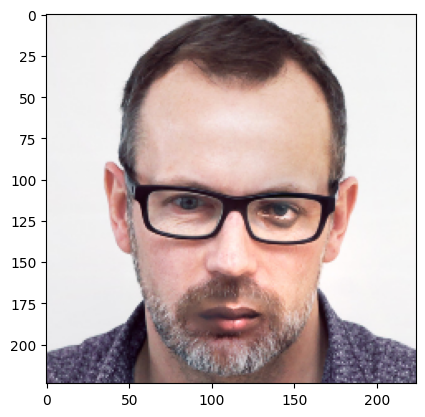

In [34]:
n = 230

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 19ms/step
Probabilities:  [0.5091441  0.49085584]
Actual:  Fake-Face
13/13 [==============================] - 2s 144ms/step
Prediction:  Real-Face


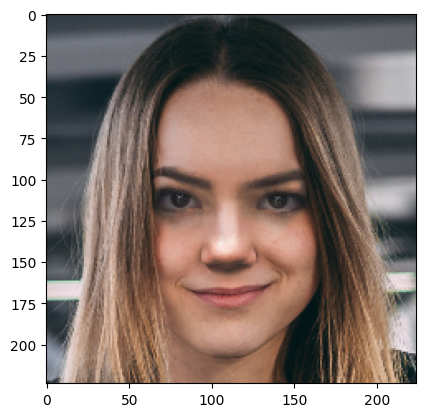

In [35]:
n = 105

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

1/1 [==============================] - 0s 22ms/step
Probabilities:  [0.421216 0.578784]
Actual:  Real-Face
13/13 [==============================] - 2s 143ms/step
Prediction:  Fake-Face


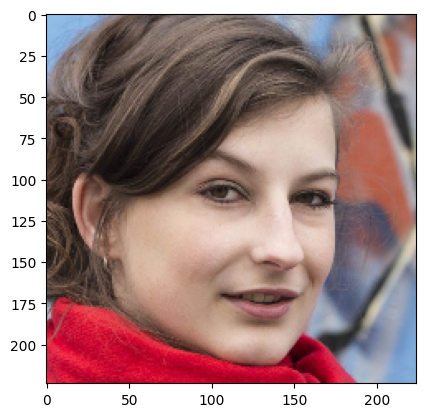

In [36]:
n = 1

prediction = model.predict(prepare(X_test[n]))
print("Probabilities: ",predictions[n])

x = ["Real-Face" if y_test[n]== 0 else "Fake-Face"]
print("Actual: ",x[0])
rounded_prediction = np.mean(model.predict(X_test), axis=1)
y = ["Real-Face" if d.iloc[n,0]>=0.5 else "Fake-Face"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()